# Exploratory data analysis (EDA)
For the EDA we will explore the following ; 
1. Data Structure & Missing values 
2. Data summary 
3. Feature distribution - Categorical Insights - Trends
4. Correlation

## Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading data

In [5]:
train = pd.read_csv("GiveMeSomeCredit/cs-training.csv")
test = pd.read_csv("GiveMeSomeCredit/cs-test.csv")
data_excel = pd.read_excel("GiveMeSomeCredit/Data Dictionary.xls")
sample_data = pd.read_csv("GiveMeSomeCredit/sampleEntry.csv")

In [6]:
train_df = train.copy()
test_df = test.copy()

## 1. Data structure & Missing values

In [7]:
print("====== SUMMARY =======")
print()
print(f"Training set size: {train_df.shape}")
print(f"Testing set size:  {test_df.shape}")
print()
print(f"All features in the training dataset: {', '.join(map(str, train_df.columns))}")
print(f"All features in the testing dataset: {', '.join(map(str, test_df.columns))}")
print()
print("---Training set survivability---")
print(f"Number of Applicants: {train_df.shape[0]}")
print(f"Number of Applicants with financial distress = {len(train_df[train_df['SeriousDlqin2yrs'] == 1])}")
print(f"Percentage of Applicants with financial distress = {len(train_df[train_df['SeriousDlqin2yrs'] == 1]) / train_df.shape[0] * 100} %")
print()
print("---Missing data [%]---")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
print()
print("---Data types---")
print(train_df.info())
print()

====== SUMMARY =======

Training set size: (150000, 12)
Testing set size:  (101503, 12)

All features in the training dataset: Unnamed: 0, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents
All features in the testing dataset: Unnamed: 0, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents

---Training set survivability---
Number of Applicants: 150000
Number of Applicants with financial distress = 10026
Percentage of Applicants with financial distress = 6.683999999999999 %

---Missing data [%]---
MonthlyIncome         29731
NumberOfDependents     3924
dtype

## 2.Data Summary

In [15]:
print("====== Data Summary =======")
round(train_df.describe(),2)

====== Data Summary =======


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


## 3. Feature distribution - Categorical Insights - Trends

In [21]:
plt.style.use("seaborn-v0_8")

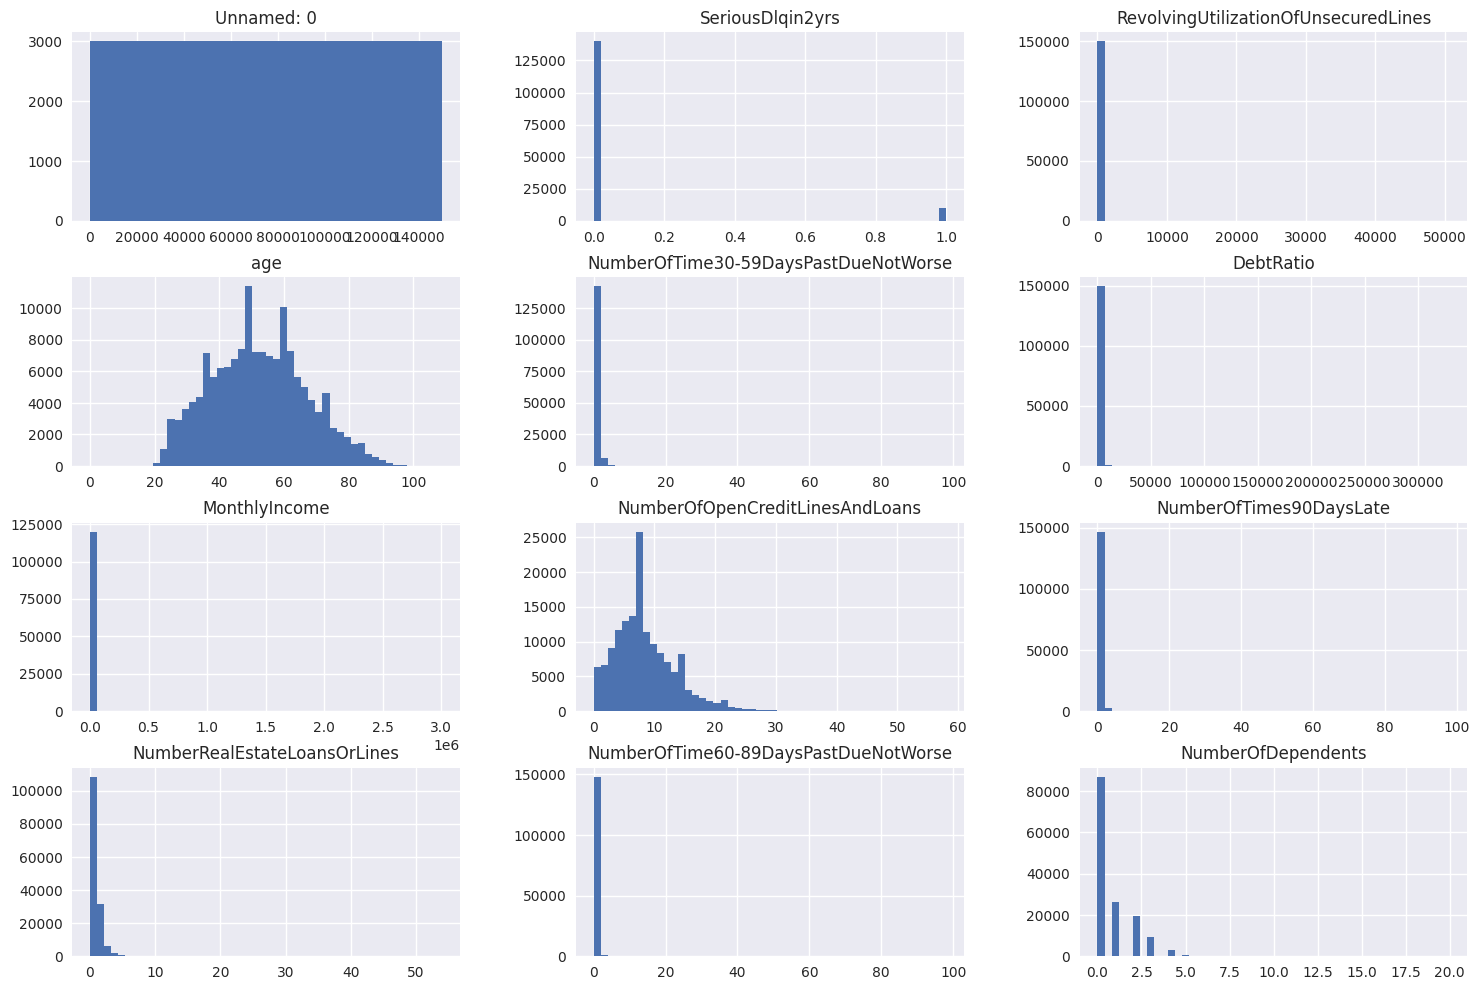

In [26]:
train_df.hist(bins=50, figsize=(18,12))
plt.show()

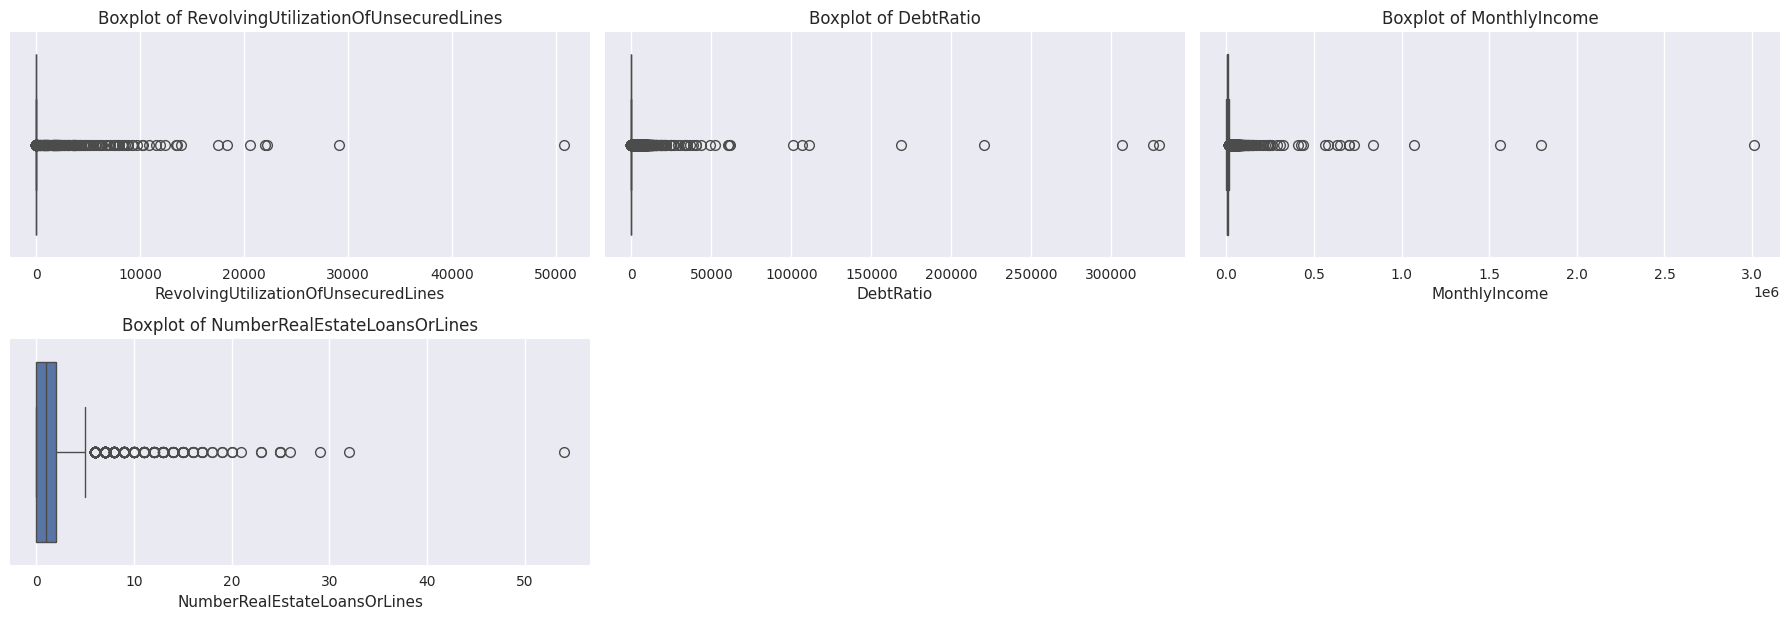

In [29]:
outliers_col = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberRealEstateLoansOrLines']
plt.figure(figsize=(18, 12)) # Set overall figure size
for i, col in enumerate(train_df[outliers_col], 1):
    plt.subplot(4, 3, i) # Create subplot in 4x3 grid
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

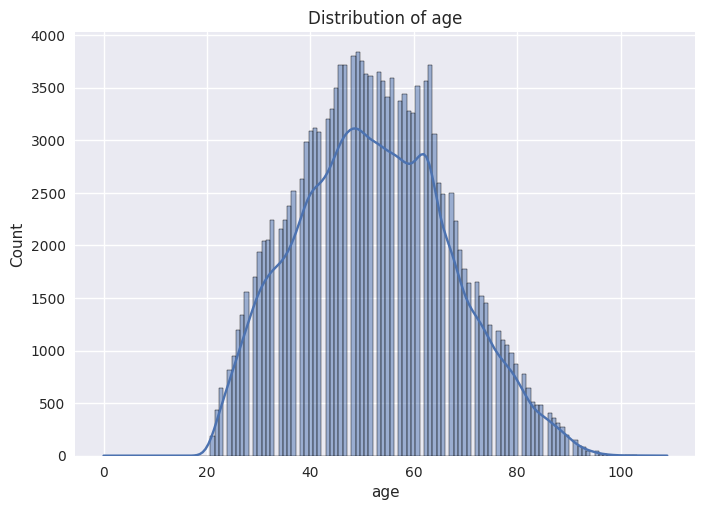

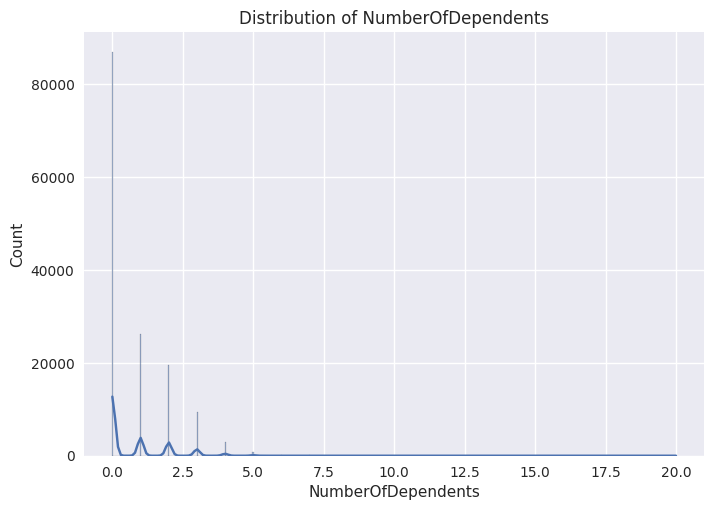

In [30]:
dist_col = ['age','NumberOfDependents']

for col in train_df[dist_col]:
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 4.Correlation

/tmp/ipykernel_9849/2079293911.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


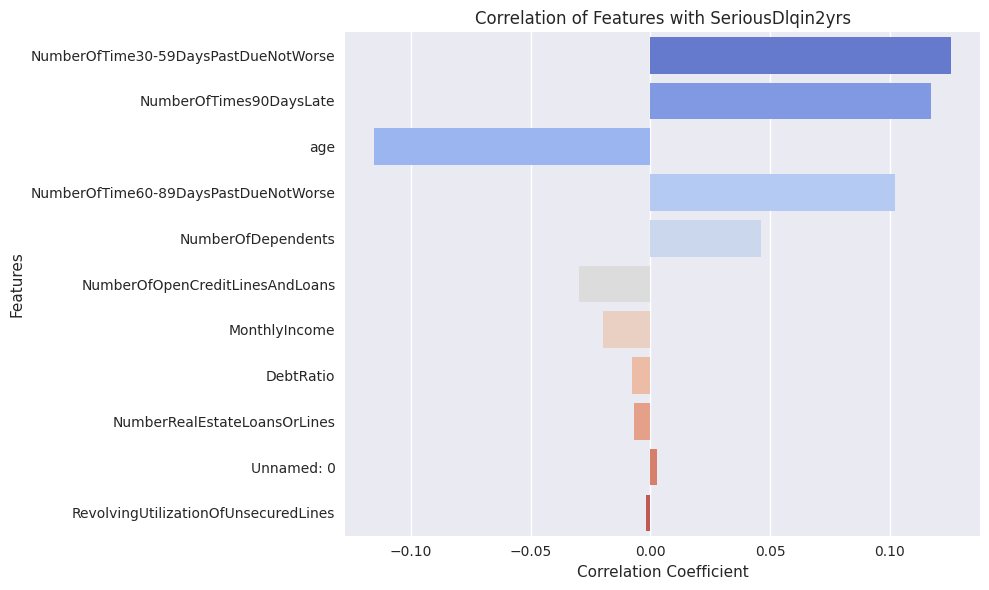

In [31]:
# Calculate correlation of each feature with SeriousDlqin2yrs
target_corr = train_df.corr()['SeriousDlqin2yrs']

# Sort correlations by absolute value (optional, for better visualization)
target_corr = target_corr.sort_values(key=abs, ascending=False).drop('SeriousDlqin2yrs')

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with SeriousDlqin2yrs")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Handling Missing data & Feature engineering

### Handling Missing income missing values via age groups

In [38]:
def preprocess(df):
    df = df.copy()
    age_groups = [0,25,35,45,55,65,75]
    labels = [0,1,2,3,4,5]
    # Income per age group
    df["age_group"] = pd.cut(df['age'],bins=age_groups,labels=labels,include_lowest=True)
    median_income_by_age = df.groupby('age_group')['MonthlyIncome'].median()
    df['MonthlyIncome'] = df['MonthlyIncome'].replace(0, np.nan)
    df['MonthlyIncome'] = df.apply(lambda row:  median_income_by_age[row['age_group']] if pd.isnull(row['MonthlyIncome'])else row['MonthlyIncome'],axis=1)
    print("Remaining missing values in MonthlyIncome:", df['MonthlyIncome'].isnull().sum())

    

In [39]:
preprocess(train_df)

/tmp/ipykernel_9849/3488942474.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_income_by_age = df.groupby('age_group')['MonthlyIncome'].median()


KeyError: np.float64(nan)